<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/Ch11PagonisGitHub/IR290LandTallposrhofixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FOM= 10.94  %


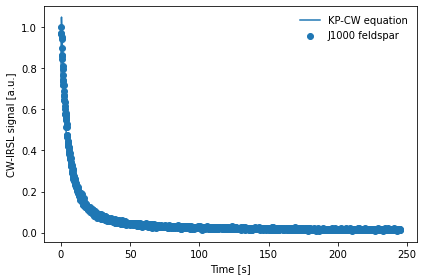

FOM= 11.88  %


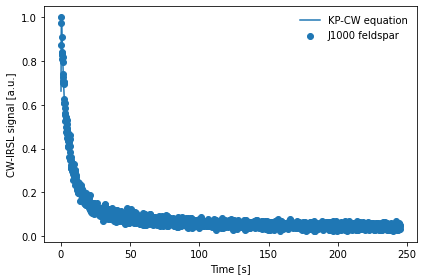

FOM= 11.12  %


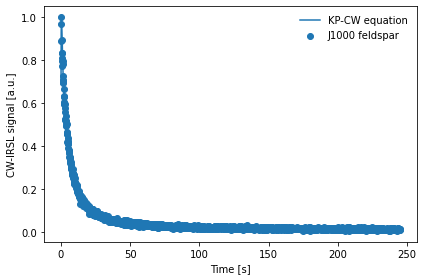

FOM= 12.88  %


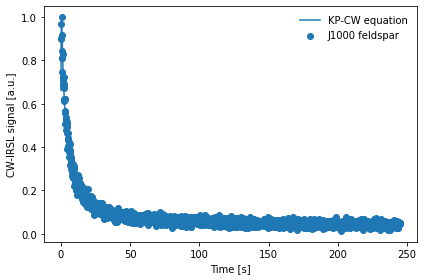

FOM= 10.7  %


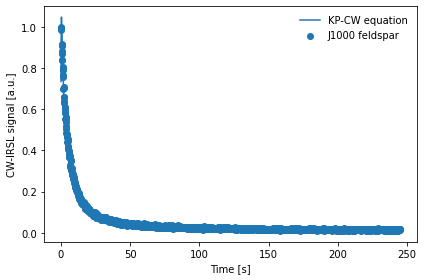

FOM= 11.99  %


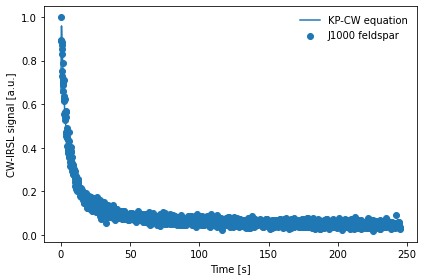

FOM= 10.73  %


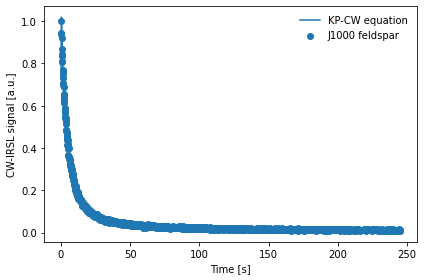

FOM= 11.56  %


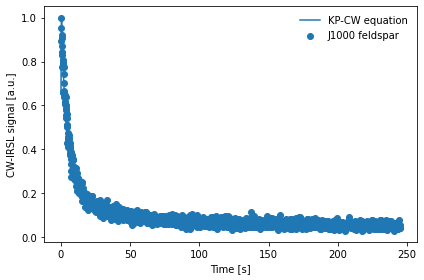

FOM= 11.07  %


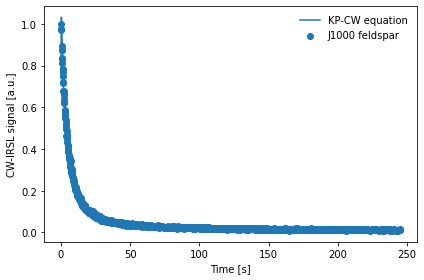

FOM= 10.86  %


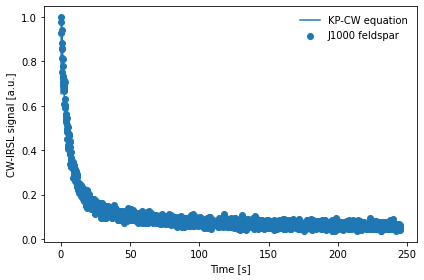

FOM= 32.02  %


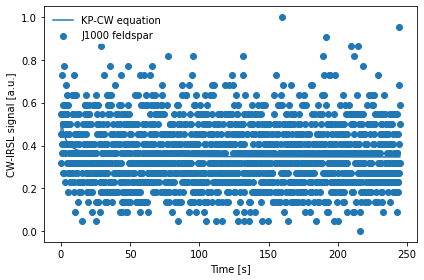

FOM= 16.28  %


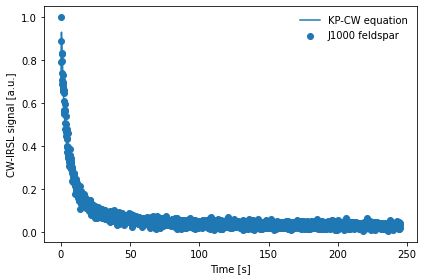

FOM= 10.89  %


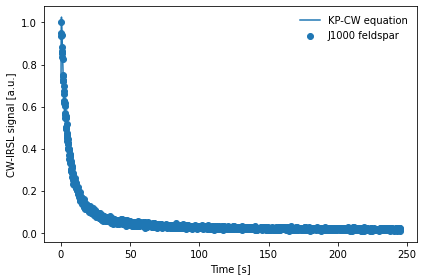

FOM= 13.75  %


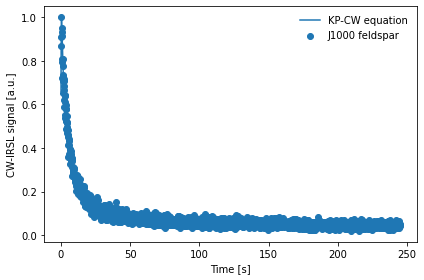

FOM= 13.24  %


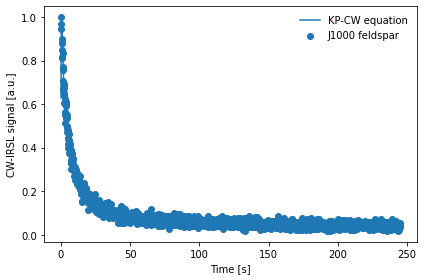

FOM= 18.53  %


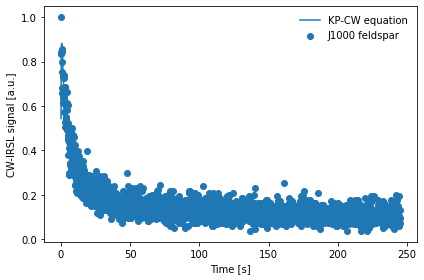

FOM= 14.51  %


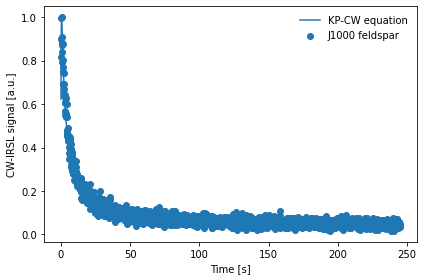

FOM= 19.17  %


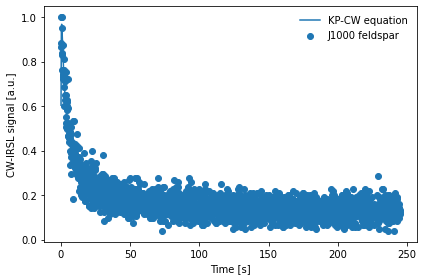

FOM= 12.45  %


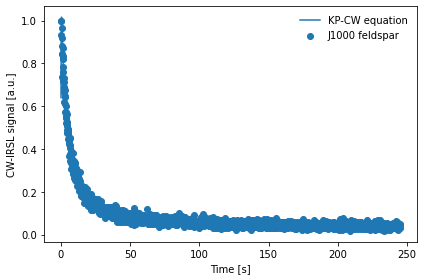

FOM= 18.85  %


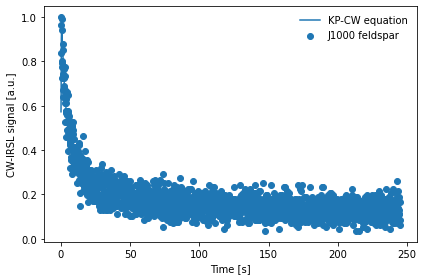

FOM= 11.44  %


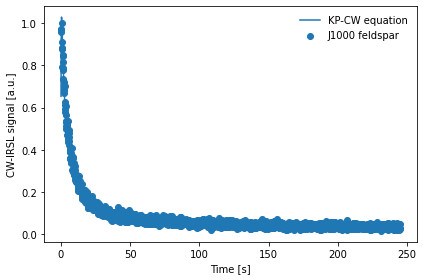

FOM= 18.56  %


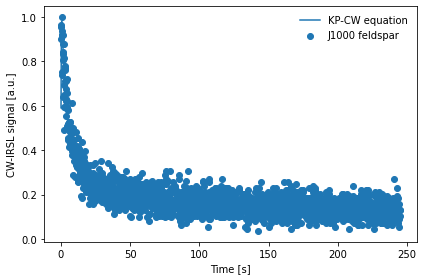

FOM= 10.99  %


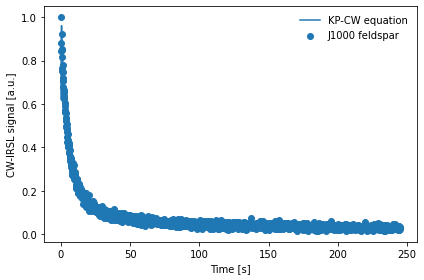

FOM= 17.67  %


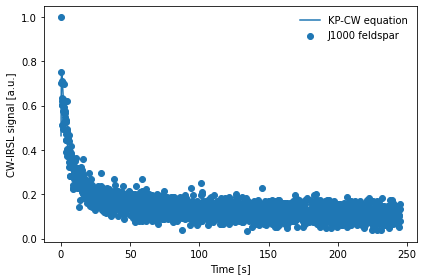

FOM= 32.85  %


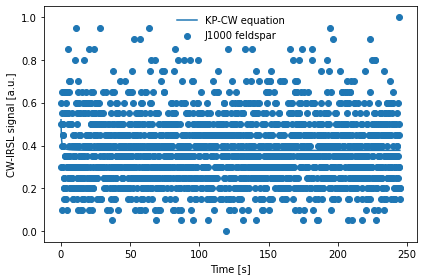

FOM= 22.4  %


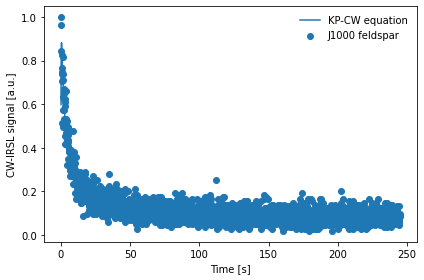

FOM= 15.39  %


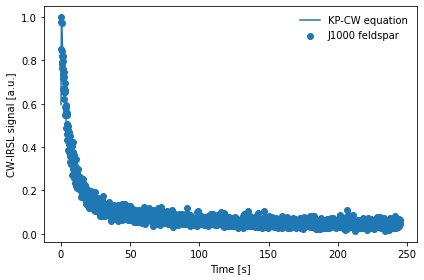

FOM= 19.53  %


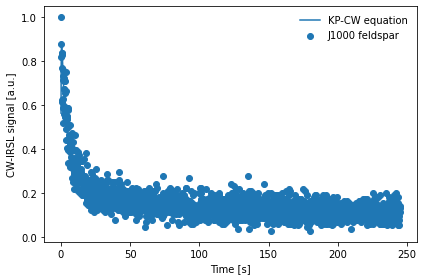

FOM= 14.08  %


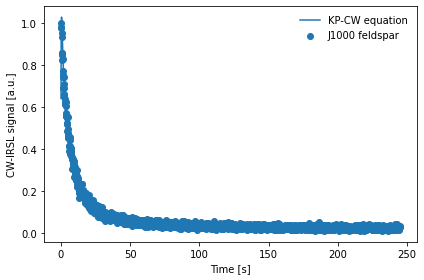

FOM= 17.82  %


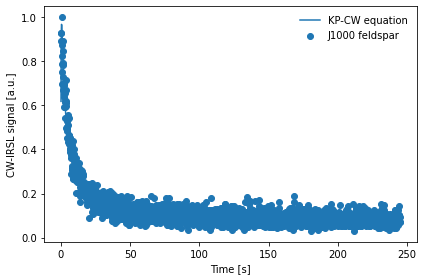

FOM= 16.67  %


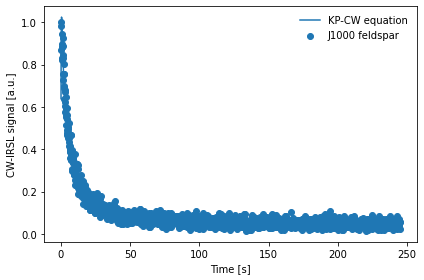

FOM= 20.89  %


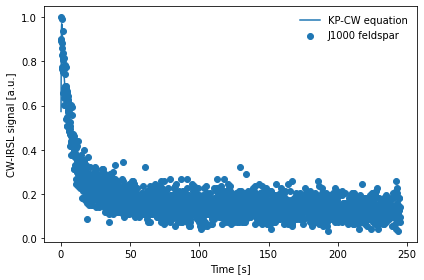

FOM= 13.93  %


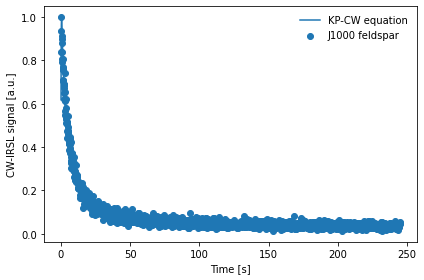

FOM= 18.97  %


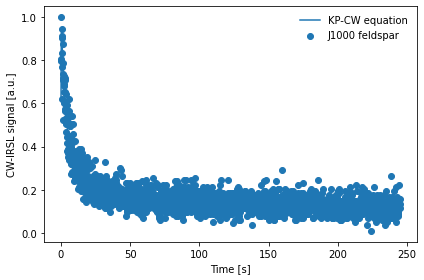

FOM= 12.54  %


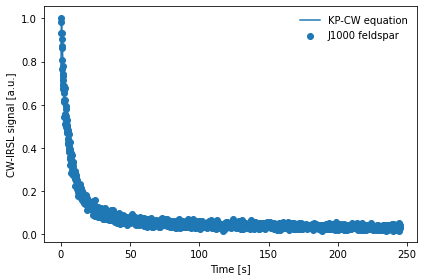

FOM= 17.84  %


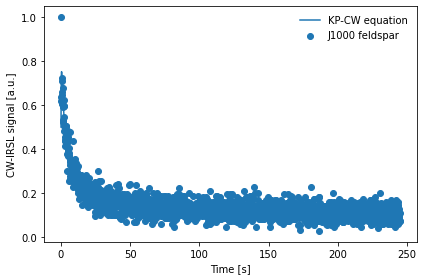

FOM= 11.23  %


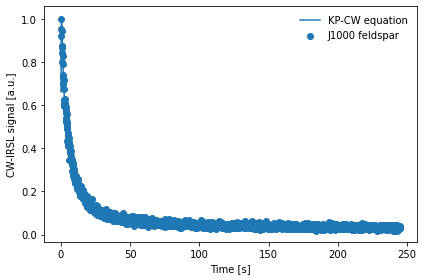

FOM= 16.34  %


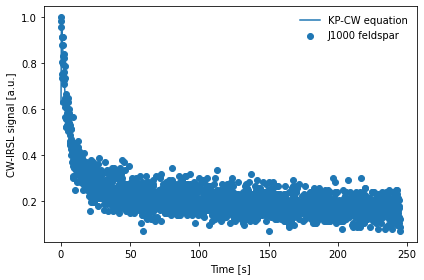

FOM= 35.63  %


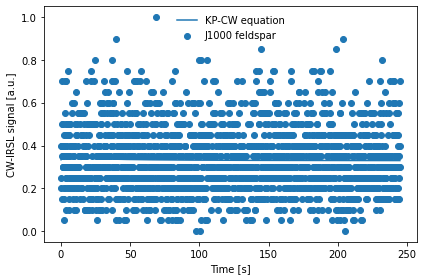

FOM= 21.41  %


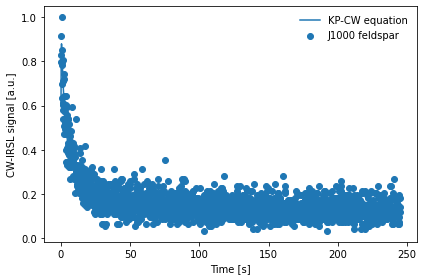

FOM= 15.59  %


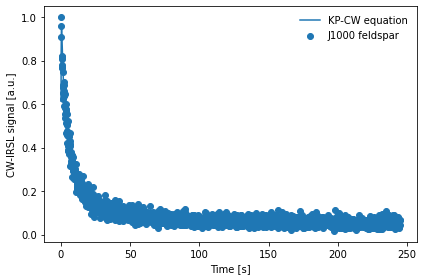

FOM= 18.94  %


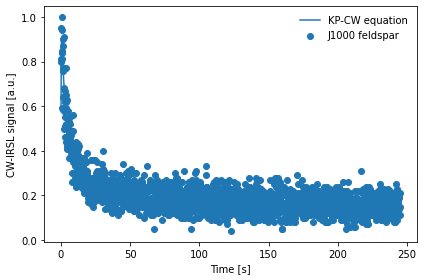

FOM= 10.48  %


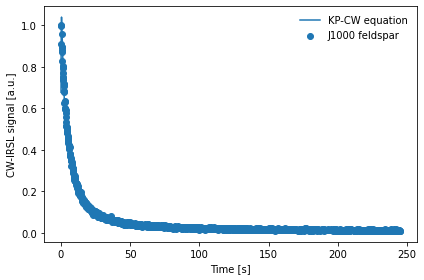

FOM= 10.7  %


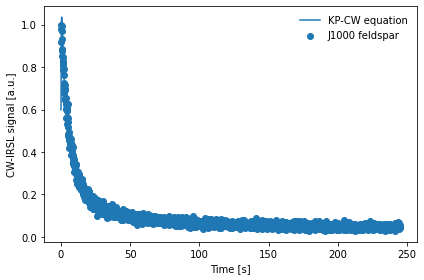

FOM= 9.43  %


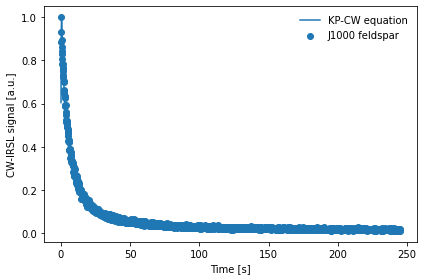

FOM= 11.38  %


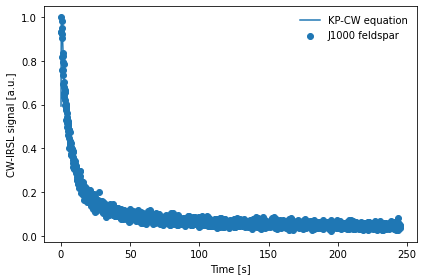

FOM= 8.94  %


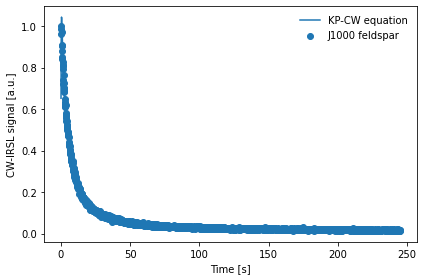

FOM= 10.39  %


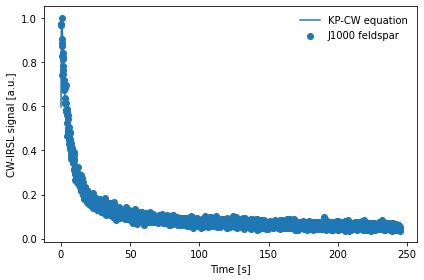

FOM= 8.77  %


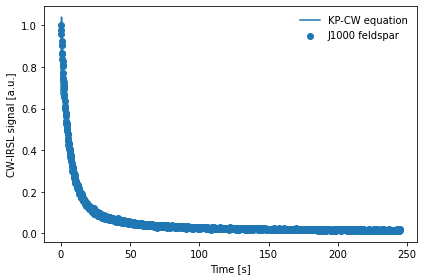

FOM= 9.7  %


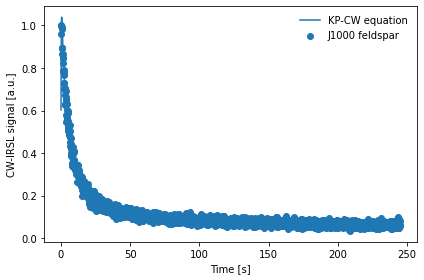

FOM= 8.67  %


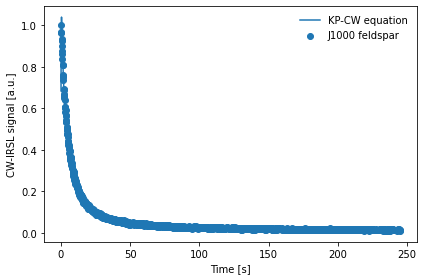

FOM= 9.42  %


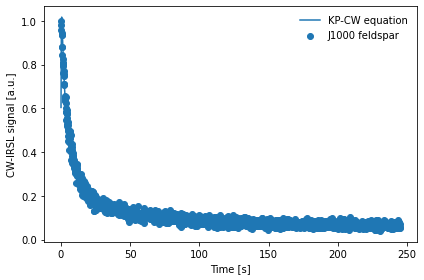

FOM= 30.16  %


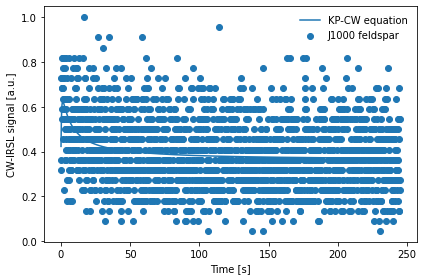

FOM= 13.29  %


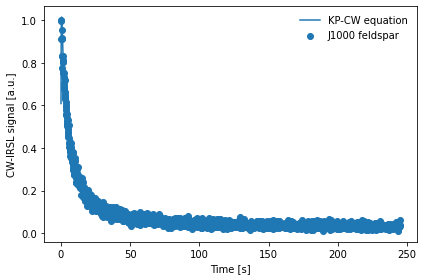

FOM= 8.81  %


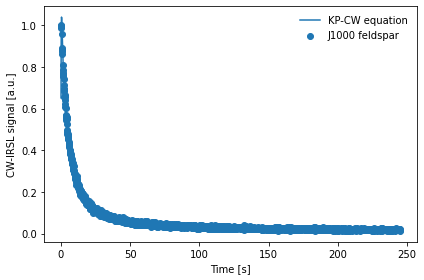

FOM= 11.31  %


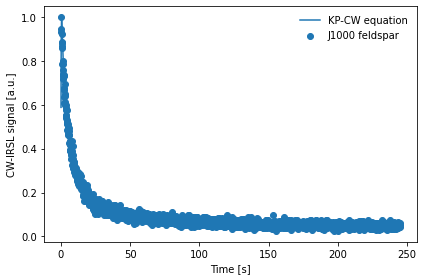

FOM= 11.43  %


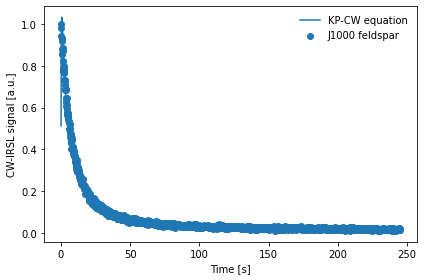

FOM= 12.05  %


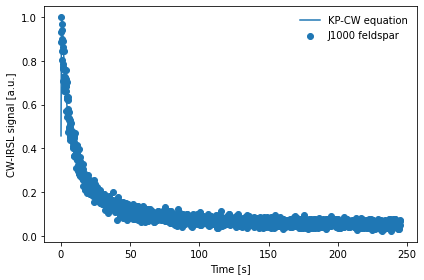

FOM= 11.65  %


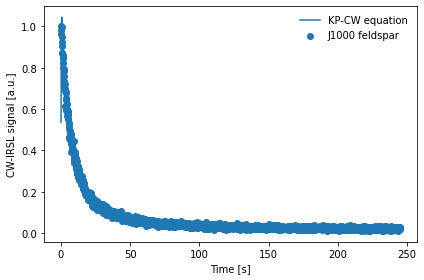

FOM= 14.75  %


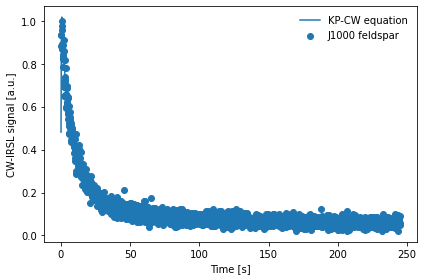

FOM= 11.62  %


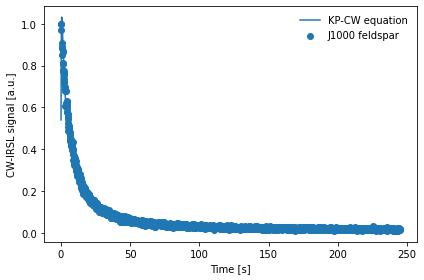

FOM= 13.13  %


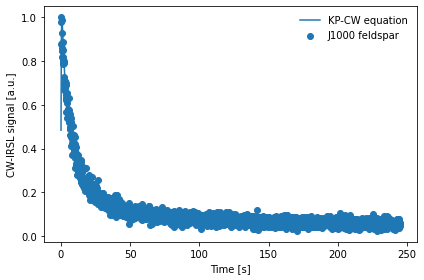

FOM= 11.11  %


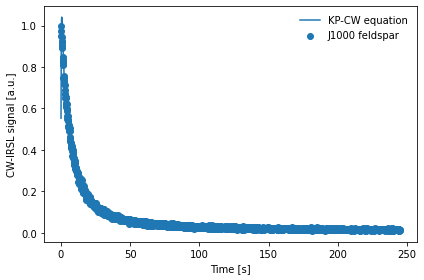

FOM= 12.73  %


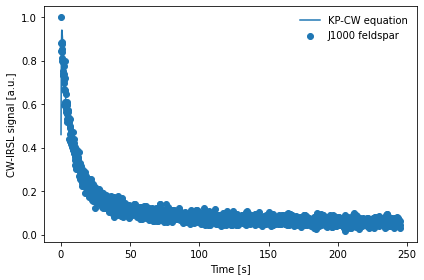

FOM= 11.12  %


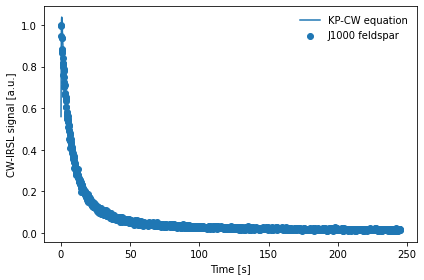

FOM= 12.9  %


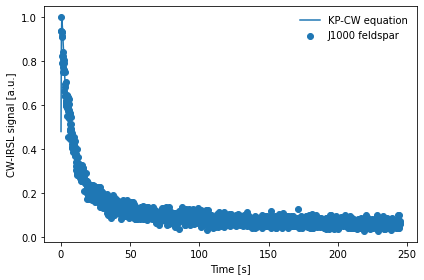

FOM= 31.73  %


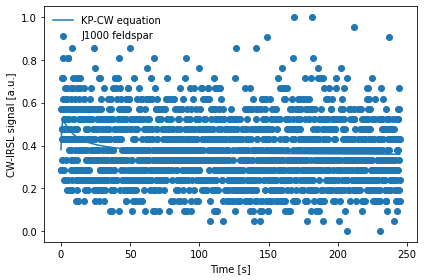

FOM= 17.69  %


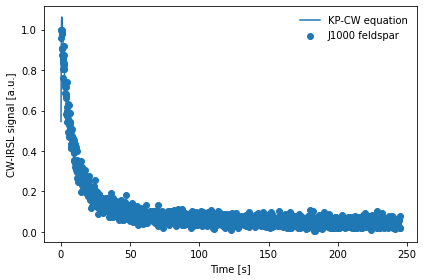

FOM= 12.12  %


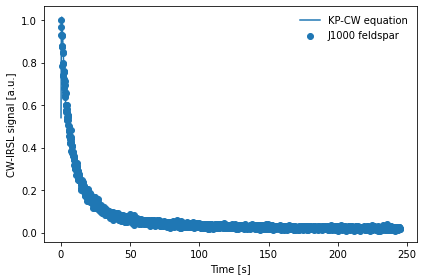

FOM= 14.58  %


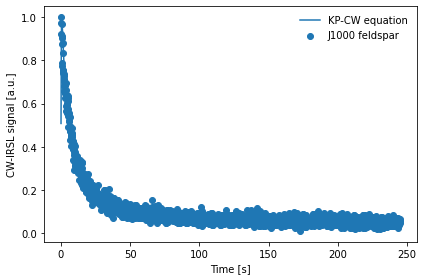

FOM= 13.41  %


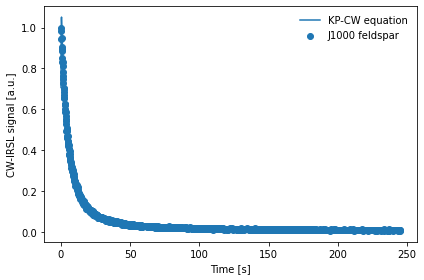

FOM= 10.33  %


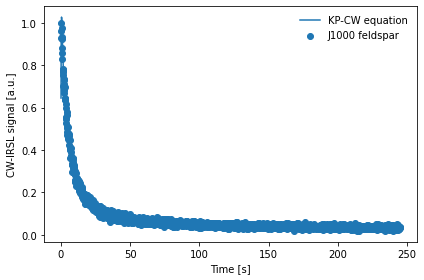

FOM= 12.95  %


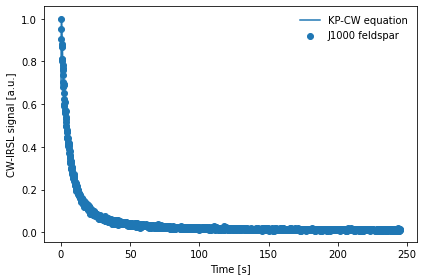

FOM= 13.2  %


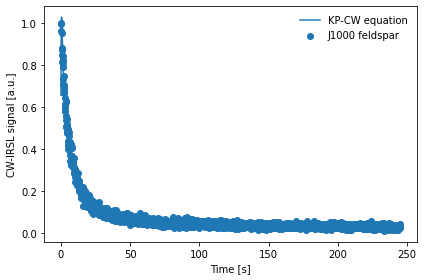

FOM= 13.33  %


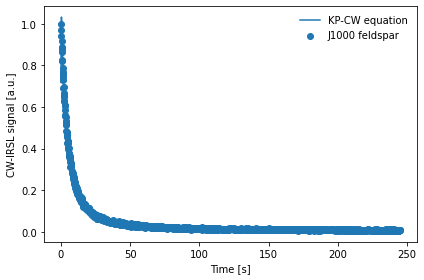

FOM= 12.34  %


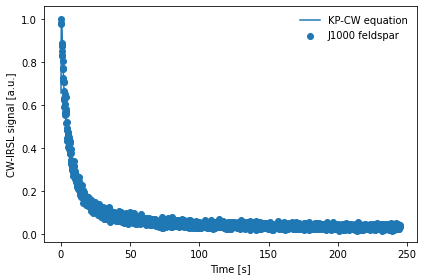

FOM= 13.74  %


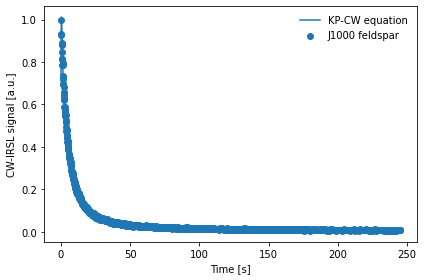

FOM= 11.32  %


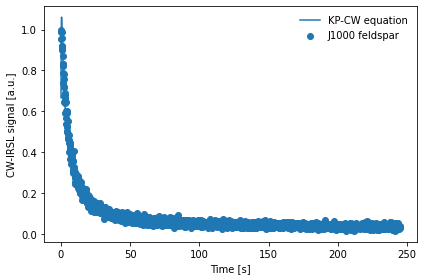

FOM= 13.95  %


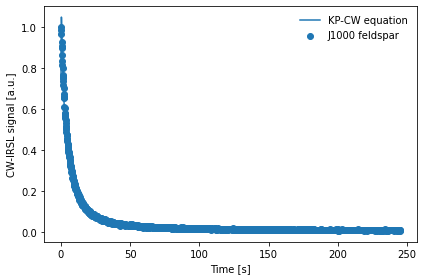

FOM= 11.32  %


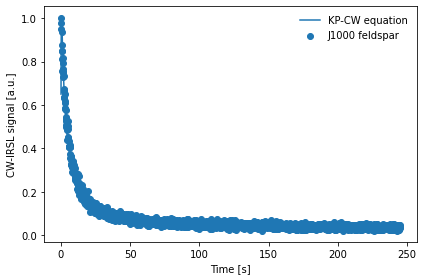

FOM= 32.63  %


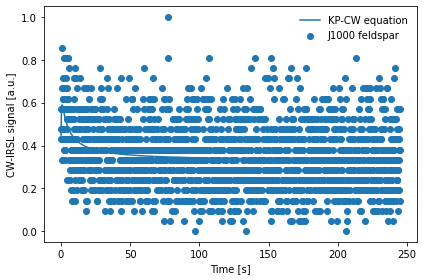

FOM= 15.89  %


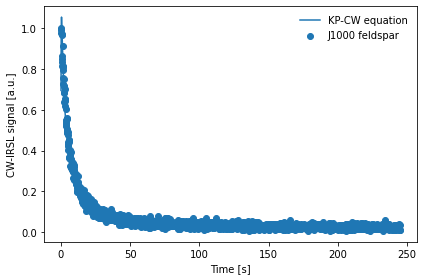

FOM= 12.71  %


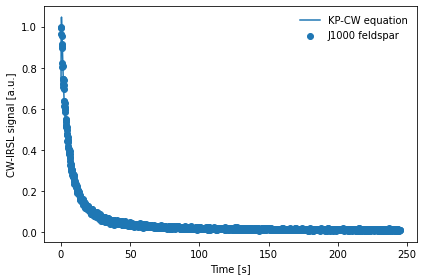

FOM= 13.42  %


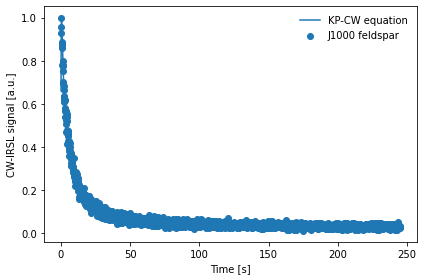

FOM= 12.49  %


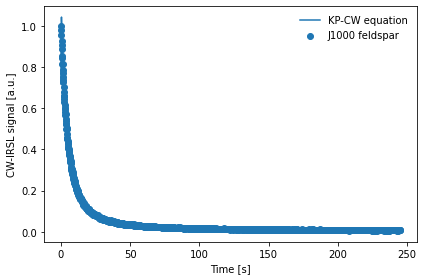

FOM= 8.4  %


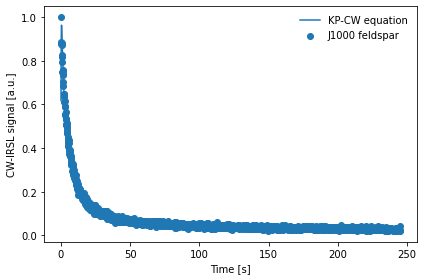

FOM= 12.29  %


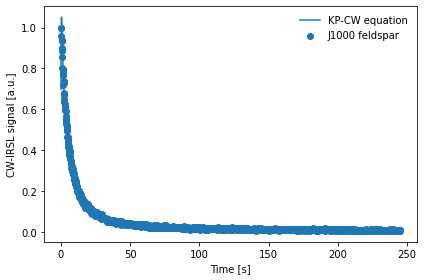

FOM= 11.14  %


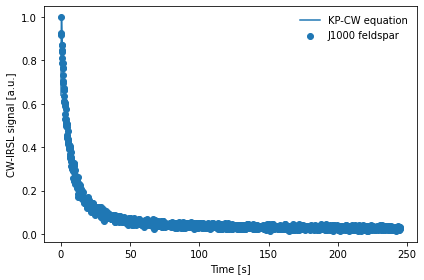

FOM= 12.3  %


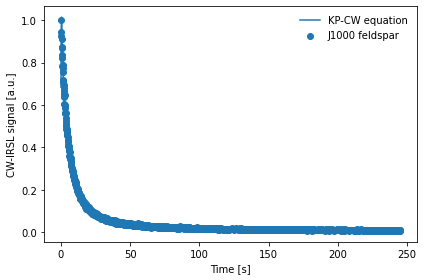

FOM= 10.16  %


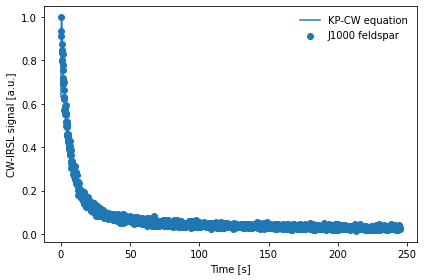

FOM= 12.71  %


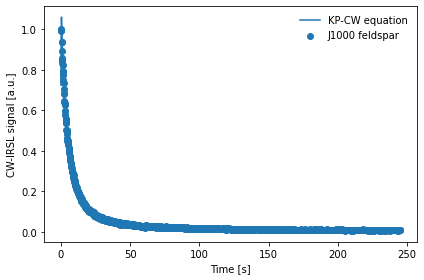

FOM= 9.88  %


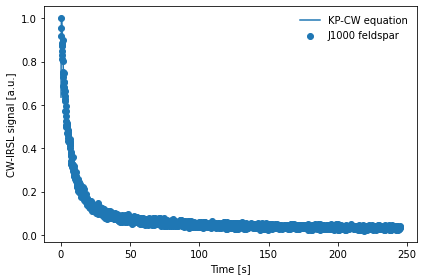

FOM= 12.54  %


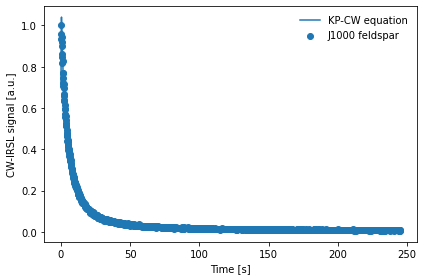

FOM= 10.29  %


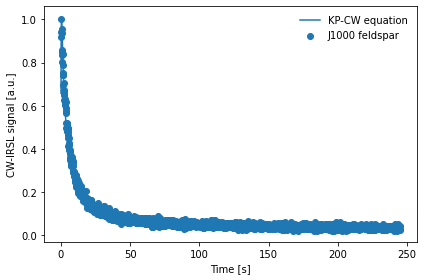

FOM= 33.1  %


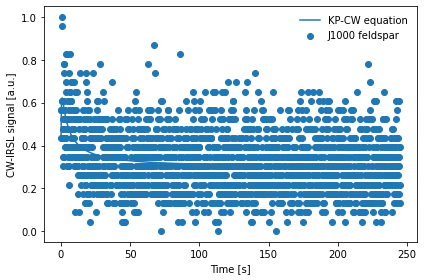

FOM= 16.57  %


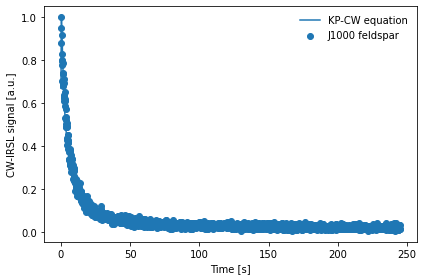

13.314432989690722 +- 0.0


[0,
 12.57,
 12.03,
 12.97,
 12.12,
 13.21,
 12.19,
 13.61,
 11.38,
 13.8,
 11.58,
 11.89,
 12.94,
 13.0,
 11.93,
 11.12,
 9.76,
 10.97,
 9.87,
 11.01,
 9.42,
 11.19,
 9.26,
 11.55,
 9.48,
 277.22,
 11.74,
 10.58,
 10.29,
 11.04,
 10.77,
 10.83,
 9.11,
 10.99,
 11.02,
 12.22,
 10.78,
 11.8,
 9.81,
 3.12,
 11.78,
 11.37,
 9.75,
 11.87,
 9.74,
 10.86,
 10.05,
 11.15,
 9.98,
 11.62,
 9.62,
 12.03,
 9.87,
 4.13,
 10.36,
 11.17,
 10.12,
 8.37,
 7.41,
 8.66,
 7.55,
 8.92,
 7.79,
 9.1,
 7.77,
 9.26,
 7.71,
 3.23,
 8.46,
 9.08,
 8.34,
 12.47,
 11.05,
 12.71,
 11.35,
 13.11,
 11.64,
 13.37,
 11.05,
 13.62,
 11.5,
 6.19,
 11.98,
 12.8,
 11.89,
 12.92,
 11.4,
 12.25,
 11.67,
 12.51,
 11.48,
 12.75,
 11.16,
 12.84,
 11.6,
 6.37,
 12.53]

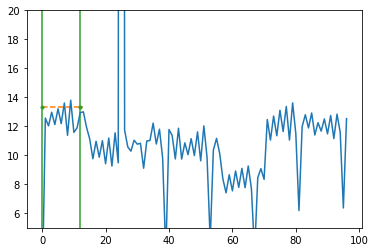

In [8]:
# Tunisia CW-IRSL 290oC  data fitted with KP-CW equation
from scipy import optimize
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

url='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/IR290LandTallpos.TXT'
df =pd.read_table(url,delimiter='\t')
rhos, drhos, As ,dAs =[0]*df.shape[1],[0]*df.shape[1],[0]*df.shape[1],[0]*df.shape[1]
 
for i in range(1,df.shape[1],1):
    x_data,y_data = df.iloc[:, 0].to_numpy(), df.iloc[:, i].to_numpy()
    y_data=y_data/max(y_data)
    rho=0.0040
    def test_func(x, imax_fit, A_fit,bgd_fit):
        return imax_fit*np.exp (-rho*(np.log(1 + A_fit*x))\
    	** 3.0)*(np.log(1+A_fit*x)**2.0)/(1+x*A_fit)+bgd_fit
    params, cov = optimize.curve_fit(test_func,\
    x_data, y_data,maxfev=10000)
    #drho= round(np.sqrt(cov[1][1]),5)
    #dA = round(np.sqrt(cov[2][2]),2)
    #dimax = round(np.sqrt(cov[0][2]),2)
    plt.scatter(x_data, y_data, label='J1000 feldspar')
    plt.plot(x_data, test_func(x_data, *params[0:4]),
    label='KP-CW equation')
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)
    plt.ylabel('CW-IRSL signal [a.u.]')
    plt.xlabel('Time [s]')
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)
    plt.tight_layout()
    imax, A, bgd=int(params[0]),\
    round(params[1],2),round(params[-1],3)
    res=test_func(x_data, *params)-y_data
    FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
    #myTable=PrettyTable(["A",'dA', "rho",  "d(rho)",\
    #"s'(s^-1)","ds'",'bgd'])  
    #myTable.add_row([imax,dimax,rho,drho, A, dA,bgd])
    print('FOM=',FOM,' %')
    #print(myTable)
    plt.show()
    #print(dA)
    #rhos[i]= rho 
    As[i] = A
    #drhos[i] = drho 
    #dAs[i] =  dA



As
print(np.mean(As),'+-',np.mean(dAs))
plt.errorbar(range(len(As)),As,yerr=dAs)
plt.ylim(5,20)

point1 = [0,np.mean(As)]
point2 = [13,np.mean(As)]
x_values = [point1[0], point2[0]] 
y_values = [point1[1], point2[1]] 
plt. plot(x_values, y_values,'--')

plt.errorbar([0,12],[np.mean(As),np.mean(As)],
             yerr=[np.std(As),np.std(As)],fmt='.')
np.std(As)

rhos
As


In [5]:
x_data, y_data

(array([1.3000e-01, 2.5000e-01, 3.8000e-01, ..., 2.4465e+02, 2.4477e+02,
        1.9490e+03]),
 array([1.        , 0.96919431, 0.97274882, ..., 0.01303318, 0.01658768,
               nan]))

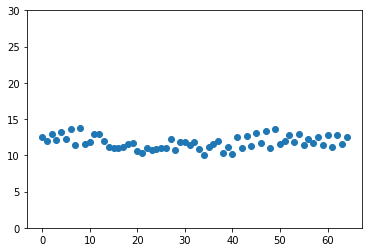

A= 11.802 +- 0.894
N= 65


In [9]:


new_As = [item for item in As if item >= 10] 
new_As = [item for item in new_As if item <= 22] 
plt.plot(range(len(new_As)),new_As,'o')
plt.ylim(0,30)
plt.show()
print('A=',round(np.mean(new_As),3),'+-',round(np.std(new_As),3))
print('N=',len(new_As))